# Project 2:  Linear Regression & Classification Project

In this project, I used the dataset that was preprocessed in Project 1. First needed to figure out the x and y attributes, and since I only had one numerical attribute, named "values", this task was a bit challenging. Even though I had the option to append a randomly generated attribute to our dataset, **I** decided to explore other options. In the end, I decided to break down the values column based on the species.
Note: In my preprocessing I made sure that for each date (day and month combination) there exists one value for each species of the pollutant.

###1. Regression (Part (a) of the project)

####1.1 Preparing data

#####1.1.1 Needed functions

In [ ]:
import collections
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

#####1.1.2 Loading the dataset with normalized values

In [ ]:
import pandas as pd

data = pd.read_csv('./LaqnData-cleaned-ready-for-X-Y.csv') # London air test
data.columns = ['Value_normalized', 'Species', 'day', 'month']

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 1384
Number of attributes = 4


,Value_normalized,Species,day,month
0,-0.931072,0,0.000000,0.0
1,0.145787,3,0.000000,0.0
2,-0.224196,2,0.000000,0.0
3,-0.046435,1,0.000000,0.0
4,-1.321929,0,0.033333,0.0


#####1.1.3 Loading the dataset with actual values

In [ ]:
import pandas as pd

data2 = pd.read_csv('./LaqnData-cleaned-ready-for-X-Y-not-normalized.csv') # London air test
data2.columns = ['Value', 'Species', 'day', 'month']

print('Number of instances = %d' % (data2.shape[0]))
print('Number of attributes = %d' % (data2.shape[1]))
data2.head()

Number of instances = 1384
Number of attributes = 4


,Value,Species,day,month
0,16.558333,0,0.000000,0.0
1,44.545833,3,0.000000,0.0
2,34.930000,2,0.000000,0.0
3,39.550000,1,0.000000,0.0
4,6.400000,0,0.033333,0.0


#####1.1.4 Separating the Values column into four based on the species of the pollutant and using month,day combination as the index. (Actual Values)

In [ ]:
pivoted = data2.pivot(index=['month', 'day'], columns='Species', values='Value')
pivoted.columns = [f'Species_{col}' for col in pivoted.columns]
pivoted.head()

Species_0  Species_1  Species_2  Species_3
month day                                                 
0.0   0.000000  16.558333  39.550000  34.930000  44.545833
      0.033333   6.400000  22.687500  19.413636  49.400000
      0.066667   4.183333  33.454167  39.883333  41.170833
      0.100000  10.166667  33.995833  39.286364  48.175000
      0.133333  30.826087  69.058333  93.484211  34.875000

#####1.1.5 Separating the Values column into four based on the species of the pollutant and using month,day combination as the index. (Normalized Values)

In [ ]:
pivoted_norm = data.pivot(index=['month', 'day'], columns='Species', values='Value_normalized')
pivoted_norm.columns = [f'Species_norm_{col}' for col in pivoted_norm.columns]
pivoted_norm.head()

Species_norm_0  Species_norm_1  Species_norm_2  Species_norm_3
month day                                                                     
0.0   0.000000       -0.931072       -0.046435       -0.224196        0.145787
      0.033333       -1.321929       -0.695244       -0.821210        0.332559
      0.066667       -1.407218       -0.280981       -0.033609        0.015929
      0.100000       -1.177001       -0.260139       -0.056578        0.285425
      0.133333       -0.382100        1.088941        2.028763       -0.226312

#####1.1.6 Concatenating two datasets so I can have all the data in one dataframe

In [ ]:
combined = pd.concat([pivoted, pivoted_norm], axis=1)
combined.head()

Species_0  Species_1  Species_2  Species_3  Species_norm_0  \
month day                                                                    
0.0   0.000000  16.558333  39.550000  34.930000  44.545833       -0.931072   
      0.033333   6.400000  22.687500  19.413636  49.400000       -1.321929   
      0.066667   4.183333  33.454167  39.883333  41.170833       -1.407218   
      0.100000  10.166667  33.995833  39.286364  48.175000       -1.177001   
      0.133333  30.826087  69.058333  93.484211  34.875000       -0.382100   

                Species_norm_1  Species_norm_2  Species_norm_3  
month day                                                       
0.0   0.000000       -0.046435       -0.224196        0.145787  
      0.033333       -0.695244       -0.821210        0.332559  
      0.066667       -0.280981       -0.033609        0.015929  
      0.100000       -0.260139       -0.056578        0.285425  
      0.133333        1.088941        2.028763       -0.226312

#####1.1.7 Using values for species_1 for x and values for species 3 for y.

In [ ]:
temp = combined[['Species_1', 'Species_3']]
temp.head()
x, y = to_xy(temp, 'Species_3')
print(x)
print(y)

[[39.55    ]
 [22.6875  ]
 [33.454166]
 [33.995834]
 [69.058334]
 [59.691666]
 [23.425   ]
 [54.0375  ]
 [74.47083 ]
 [29.63077 ]
 [52.730434]
 [61.921738]
 [51.770832]
 [52.854168]
 [48.825   ]
 [50.620834]
 [37.395832]
 [32.913044]
 [78.8875  ]
 [64.07917 ]
 [77.55    ]
 [52.645832]
 [58.879166]
 [50.883335]
 [81.5125  ]
 [61.54762 ]
 [64.15833 ]
 [38.5125  ]
 [47.425   ]
 [60.416668]
 [69.770836]
 [31.35    ]
 [43.904167]
 [64.8625  ]
 [51.9375  ]
 [44.195835]
 [26.270834]
 [47.795834]
 [69.99167 ]
 [21.004349]
 [63.921738]
 [23.865217]
 [54.695835]
 [75.      ]
 [64.35652 ]
 [91.87392 ]
 [88.729164]
 [85.275   ]
 [45.829166]
 [17.2     ]
 [33.8     ]
 [50.391666]
 [47.216667]
 [40.083332]
 [29.858334]
 [25.8125  ]
 [47.895832]
 [42.6     ]
 [30.579166]
 [67.620834]
 [54.620834]
 [69.208336]
 [62.2875  ]
 [53.054165]
 [43.566666]
 [33.008335]
 [53.995834]
 [33.069565]
 [77.18696 ]
 [35.20435 ]
 [56.258335]
 [64.60435 ]
 [79.75833 ]
 [69.6125  ]
 [21.066668]
 [22.695833]
 [19.795834]

#####1.1.8 train and test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 1)
(70, 1)
(276,)
(70,)


In [ ]:
x

array([[39.55    ],
       [22.6875  ],
       [33.454166],
       [33.995834],
       [69.058334],
       [59.691666],
       [23.425   ],
       [54.0375  ],
       [74.47083 ],
       [29.63077 ],
       [52.730434],
       [61.921738],
       [51.770832],
       [52.854168],
       [48.825   ],
       [50.620834],
       [37.395832],
       [32.913044],
       [78.8875  ],
       [64.07917 ],
       [77.55    ],
       [52.645832],
       [58.879166],
       [50.883335],
       [81.5125  ],
       [61.54762 ],
       [64.15833 ],
       [38.5125  ],
       [47.425   ],
       [60.416668],
       [69.770836],
       [31.35    ],
       [43.904167],
       [64.8625  ],
       [51.9375  ],
       [44.195835],
       [26.270834],
       [47.795834],
       [69.99167 ],
       [21.004349],
       [63.921738],
       [23.865217],
       [54.695835],
       [75.      ],
       [64.35652 ],
       [91.87392 ],
       [88.729164],
       [85.275   ],
       [45.829166],
       [17.2     ],


####1.2 Simple Linear Regression model

#####1.2.1 Creating a linear regression model and fitting it using x_train and y_train.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train, y_train)

LinearRegression()

#####1.2.2 Using the model that we just create we predict the values of y (pollutant values of species_3) using x_test. Then we display the predicted vs actual graph.

Root mean squared error = 13.1330
R-squared = 0.4247


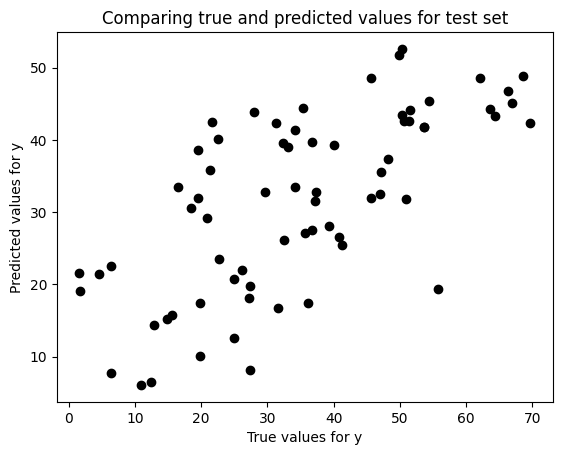

In [ ]:
y_pred_test = regr.predict(x_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

#####1.2.3 In this step we do the regression analysis and plot the data as well as the regression line.

Slope =  [-0.5410889]
Intercept =  55.791206


<ipython-input-18-de94b532c0db>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_, regr.intercept_)


Text(0, 0.5, 'y')

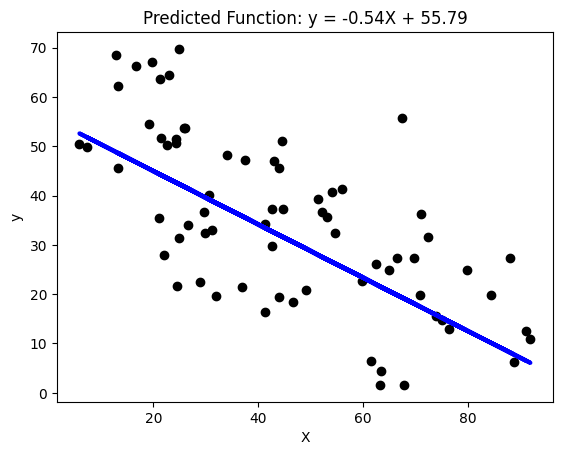

In [ ]:
# Display model parameters
print('Slope = ', regr.coef_)
print('Intercept = ', regr.intercept_)### Step 4: Postprocessing

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_, regr.intercept_)
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

####1.3 Multiple Regression Model

#####1.3.1 In this step we use values from three different species to predict the forth (in this case species 0, 1, and 2 will predict species 3.)

In [ ]:
x = combined[
    ["Species_0", "Species_1", "Species_2"]
    ]
y = combined["Species_3"]

# Once again we split these into train and test set - 80%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Regressor model
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

# We can get the intercept and coefficient of these train sets
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  50.14185962255491
Coefficients:


[('Species_0', -0.6064824529955056),
 ('Species_1', 0.2382638769077961),
 ('Species_2', -0.25425272854780423)]

#####1.3.2 Similar to part 1.2.2 we make our predictions using the model that we just created (in this case MLR)

In [ ]:
# From here we can make a prediction of the test set
y_pred_test_mlr = mlr.predict(x_test)
y_pred_train_mlr = mlr.predict(x_train)
# Predicted values
print("Prediction for test set: {}".format(y_pred_test_mlr))

Prediction for test set: [ 40.10947154  42.48991356 -10.7131595   48.04927378  48.24388173
  44.23171785  23.92420841  24.13953985  40.17634871  26.56964899
  35.85556502  31.23402598  21.75976978  49.08768834  18.50070002
  26.50357986  22.85069209  45.92819677  38.89979616  31.78473408
   9.73347139  34.09719602  15.27747982  24.69482242  29.43020344
  35.93774815  22.4880853    3.20353291  47.1999951   13.28821422
  30.43180879  18.09123654  42.87018888  48.34860989  12.52817093
  16.8939104   32.8751828   11.61813825  35.84971815  33.10261532
  21.56552466  48.4231965   44.71097263  34.56879095  47.25894815
  43.45009983  40.00786776  20.79973912  46.77983075  27.27377753
  40.85171284  21.08738069  41.26427649   0.74929379  38.34691639
  35.31431955  48.72319759  17.2219955   38.61761586  43.64160608
  48.08618669  45.14062464  13.0522222   -8.97947252  34.3132127
  47.76751048  39.87531206  42.77286351  34.23337716  48.16558443]


In [ ]:
# Now we compare the actual values to the predicted values
mlr_diff = pd.DataFrame({"Actual value": y_test, "Predicted value": y_pred_test_mlr})
mlr_diff.head()

,,Actual value,Predicted value
month,day,,
1.000000,0.066667,23.033333,40.109472
0.181818,0.200000,61.816667,42.489914
0.909091,0.666667,2.708333,-10.713160
0.454545,0.933333,68.545833,48.049274
0.000000,0.200000,92.486363,48.243882


#####1.3.3 Ploting actual and predicted values of y using the train set:

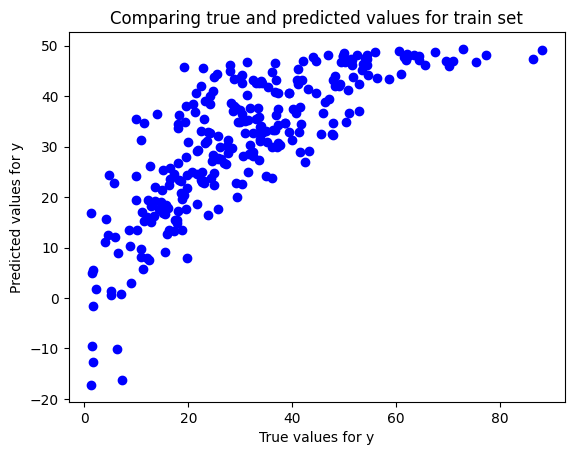

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_mlr, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

#####1.3.4 Ploting actual and predicted values of y using the test set:

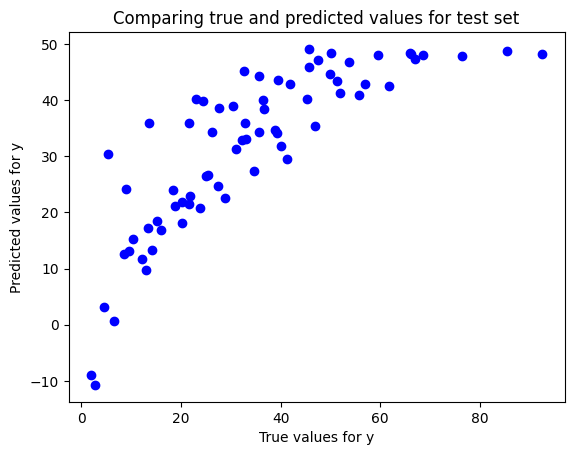

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_mlr, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

#####1.3.5 The purpose of the following block is to calculate and display metrics such as R squared, Mean Absolute Error, Square Error, and Root Mean Square Error.

In [ ]:
# From this data we can gather some metrics
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_test_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_test_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_mlr))
print("R squared: {:.2f}".format(mlr.score(x, y)))
print("Mean Absolute Error:", meanAbErr)
print("Mean Square Error:", meanSqErr)
print("Root Mean Square Error:", rootMeanSqErr)
# The preceding three values show the accuracy of the model's performance. The closer to 0, the better.
# All three values are close to zero, so these predicted values are close to accurate.

# Building a table for comparison
mlr_train_err = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_mlr))
mlr_test_err = rootMeanSqErr
mlr_abs_sum_vals = np.absolute(mlr.coef_).sum() + np.absolute(mlr.intercept_)
mlr_model = f"{mlr.intercept_:.5f} + {mlr.coef_[0]:.5f} X + {mlr.coef_[1]:.5f} X2 + {mlr.coef_[2]:.5f} X3"

mlr_vals = [mlr_model, mlr_train_err, mlr_test_err, mlr_abs_sum_vals]

mlr_results = pd.DataFrame(
    [mlr_vals], columns=["model", "train_err", "test_err", "abs sum"], index=["mlr"]
)
mlr_results

R squared: 0.63
Mean Absolute Error: 8.459177158543362
Mean Square Error: 148.1662398677024
Root Mean Square Error: 12.172355559533347


,model,train_err,test_err,abs sum
mlr,50.14186 + -0.60648 X + 0.23826 X2 + -0.25425 X3,10.611956,12.172356,51.240859


## NOTE: For Ridge (1.4) and Lasso (1.5), since alpha is a hyperparameter and can be tuned, we have utilized "GridSearchCV" to find the best alpha for our models based on the RMSE.

####1.4 Ridge Regression

#####1.4.1 Similar to MLR but as mentioned above we are parameter tuning the hyperparameter alpha.

In [ ]:
# Ridge w/ GridSearchCV
from sklearn.model_selection import GridSearchCV

ridge = linear_model.Ridge()
# param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
param_grid = {"alpha": np.logspace(-4, 1, 20)}
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error"
)
grid_search.fit(x_train, y_train)

best_ridge = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]

y_pred_train_best_ridge = best_ridge.predict(x_train)
y_pred_test_best_ridge = best_ridge.predict(x_test)

best_ridge_train_err = np.sqrt(
    metrics.mean_squared_error(y_train, y_pred_train_best_ridge)
)
best_ridge_test_err = np.sqrt(
    metrics.mean_squared_error(y_test, y_pred_test_best_ridge)
)
best_ridge_abs_sum_vals = np.absolute(best_ridge.coef_).sum() + np.absolute(
    best_ridge.intercept_
)
best_ridge_model = f"{best_ridge.intercept_:.5f} {best_ridge.coef_[0]:.5f} X + {best_ridge.coef_[1]:.5f} X2 + {best_ridge.coef_[2]:.5f} X3"

best_ridge_vals = [
    best_ridge_model,
    best_ridge_train_err,
    best_ridge_test_err,
    best_ridge_abs_sum_vals,
]

best_ridge_results = pd.DataFrame(
    [best_ridge_vals],
    columns=["model", "train_err", "test_err", "abs sum"],
    index=["best_ridge"],
)
print(f"alpha: {best_alpha}")
pd.concat([mlr_results, best_ridge_results])

alpha: 10.0


,model,train_err,test_err,abs sum
mlr,50.14186 + -0.60648 X + 0.23826 X2 + -0.25425 X3,10.611956,12.172356,51.240859
best_ridge,50.14381 -0.60631 X + 0.23806 X2 + -0.25420 X3,10.611956,12.172187,51.242379


#####1.4.2 Plotting the actual vs predicted values (using the train set)

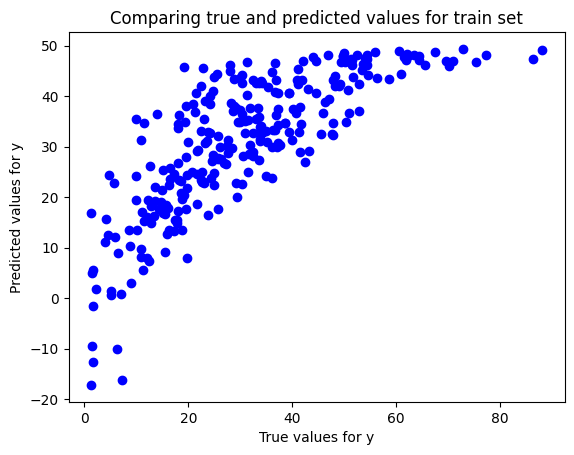

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_best_ridge, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

#####1.4.3 Plotting the actual vs predicted values (using the test set)

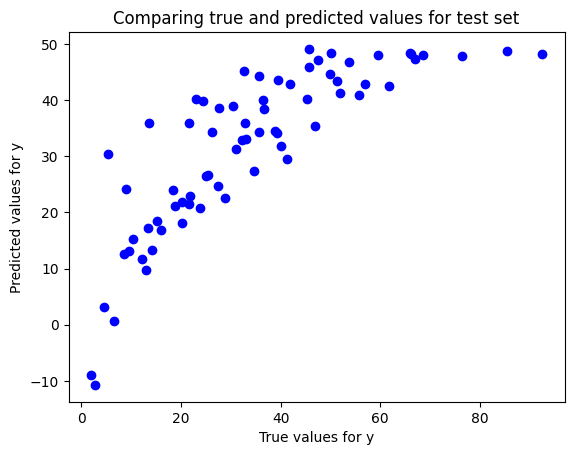

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_best_ridge, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

####1.5 Lasso Regression

#####1.5.1 Similar to MLR and Ridge; also, as mentioned above we are parameter tuning the hyperparameter alpha.

In [ ]:
# Lasso w/ GridSearchCV

from sklearn.model_selection import GridSearchCV

lasso = linear_model.Lasso()

# Setting up grid search
# param_grid = {'alpha': [0.000001, 0.00001, 0.0001, 0.1, 1]}
param_grid = {"alpha": np.logspace(-4, 1, 20)}
grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error"
)
grid_search.fit(x_train, y_train)

# Best model
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]

# Best model predictions
y_pred_train_best_lasso = best_lasso.predict(x_train)
y_pred_test_best_lasso = best_lasso.predict(x_test)

# Best model metrics
best_lasso_train_err = np.sqrt(
    metrics.mean_squared_error(y_train, y_pred_train_best_lasso)
)
best_lasso_test_err = np.sqrt(
    metrics.mean_squared_error(y_test, y_pred_test_best_lasso)
)
best_lasso_abs_sum_vals = np.absolute(best_lasso.coef_).sum() + np.absolute(
    best_lasso.intercept_
)
best_lasso_model = f"{best_lasso.intercept_:.5f} + {best_lasso.coef_[0]:.5f} X + {best_lasso.coef_[1]:.5f} X2 + {best_lasso.coef_[2]:.5f} X3"

best_lasso_vals = [
    best_lasso_model,
    best_lasso_train_err,
    best_lasso_test_err,
    best_lasso_abs_sum_vals,
]

best_lasso_results = pd.DataFrame(
    [best_lasso_vals],
    columns=["model", "train_err", "test_err", "abs sum"],
    index=["best_lasso"],
)
print(f"alpha: {best_alpha}")
pd.concat(
    [mlr_results, best_ridge_results, best_lasso_results]
)

alpha: 1.623776739188721


,model,train_err,test_err,abs sum
mlr,50.14186 + -0.60648 X + 0.23826 X2 + -0.25425 X3,10.611956,12.172356,51.240859
best_ridge,50.14381 -0.60631 X + 0.23806 X2 + -0.25420 X3,10.611956,12.172187,51.242379
best_lasso,50.32766 + -0.59345 X + 0.20732 X2 + -0.23909 X3,10.616486,12.162576,51.367514


#####1.5.2 Plotting the actual vs predicted values (using the train set)

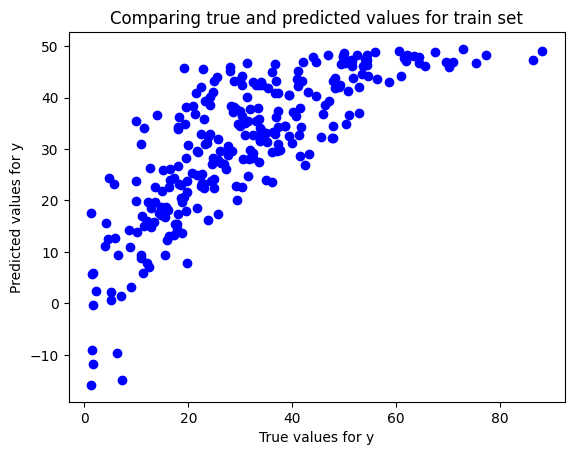

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_best_lasso, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

#####1.5.3 Plotting the actual vs predicted values (using the test set)

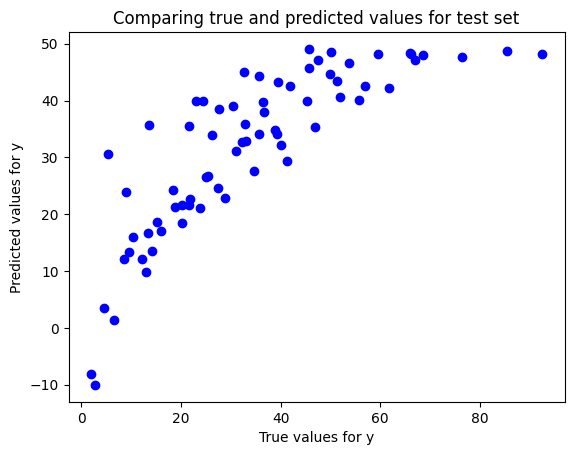

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_best_lasso, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

# Part b - Regression and Classification w/ New Data

The Admissions dataset seems straightforward - a higher 'Chance of Admit' is the result of higher test scores

We've arbitrarily GRE Score to perform regression with against Chance of Admit

In [ ]:
import pandas as pd
data = pd.read_csv('./Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv') # Admission Prediction
data.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

# Dropping the Serial No. column, as it is acts as an index and is not relevant
data = data.drop(['Serial No.'],axis=1)

# Dropping everything else, except for GRE Score and Chance of Admit
data = data.drop(['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'],axis=1)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 500
Number of attributes = 2


,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65


Plotting the relationship betwen

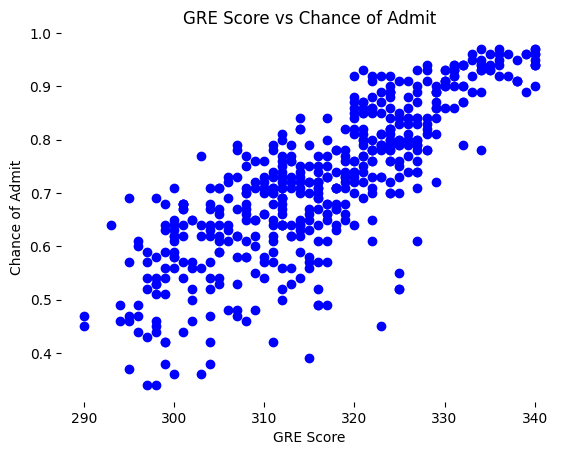

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

# Relationship between GRE Score and Chance of Admit
plt.scatter(data['GRE Score'], data['Chance of Admit'], color = 'blue')
plt.title('GRE Score vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.box(False)
plt.show()

# Data shows there is a linear correlation - higher GRE Score generally means a higher Chance of Admit

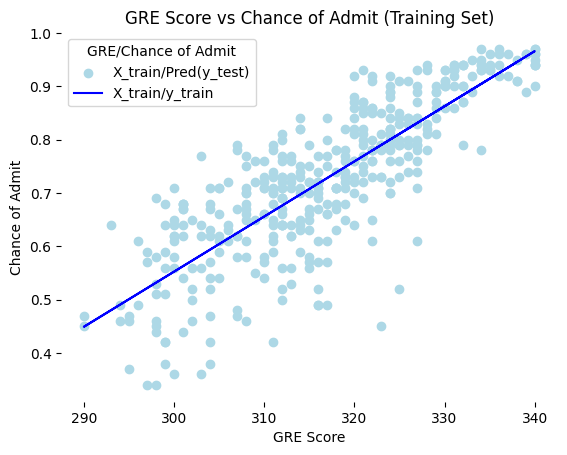

In [ ]:
# Now we split the dataset into dependent and independent variables
# GRE Score (X) is the independent variable
# Chance of Admit (y) is the dependent variable

# Splitting variables
X = data.iloc[:, :1]  # independent
y = data.iloc[:, 1:]  # dependent

# We can further split the data into training (80%) and test (20%) using train_test_split

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# We pass this X_train and y_train data into the regressor model by regressor.fit to train the model with our training data

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Now we predict the values of y (Chance of Admit) dependent on X (GRE Score) using regressor.predict

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# We can now plot these predicted results. The training sets are compared with the precdicted value of y_train

# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightblue')
plt.plot(X_train, y_pred_train, color = 'blue')
plt.title('GRE Score vs Chance of Admit (Training Set)')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'GRE/Chance of Admit', loc='best', facecolor='white')
plt.box(False)
plt.show()

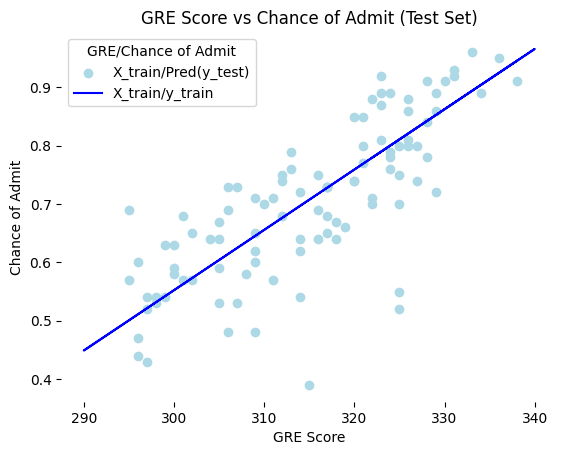

Coefficient: [[0.01033718]]
Intercept: [-2.54881269]


In [ ]:
# Next, we plot the results of test sets with X_train and the predicted value of y_train

# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightblue')
plt.plot(X_train, y_pred_train, color = 'blue')
plt.title('GRE Score vs Chance of Admit (Test Set)')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'GRE/Chance of Admit', loc='best', facecolor='white')
plt.box(False)
plt.show()

# From here we can get the coefficients and intercept of this slope
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Comparing Predicted results vs Actual results. We found that R-squared = 0.5839, indicating that there is some correlation between GRE scores and Chance of Admit


Root mean squared error = 0.0852
R-squared = 0.5839


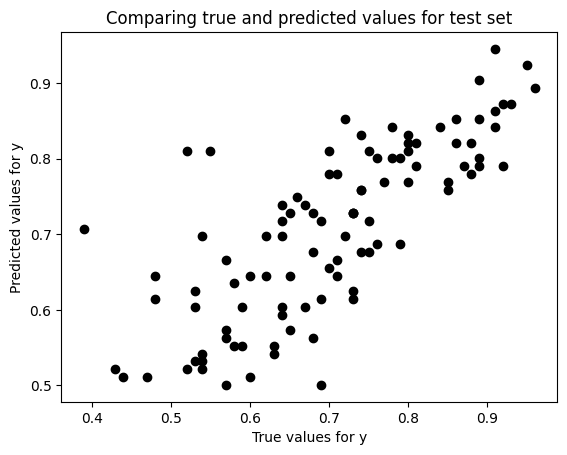

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

y_pred_test = regr.predict(X_test)

# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

## Multiple Linear Regression

Similar approach as SLR, but all columns (except Serial No.) will be used to help predict Chance of Admit


In [ ]:
# For Multiple Linear Regression, more than one predictor variable is used to predict the response variable. We will use the student data set again.
data2 = pd.read_csv(
    "./Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv"
)  # Admission Prediction
data2.columns = [
    "Serial No.",
    "GRE Score",
    "TOEFL Score",
    "University Rating",
    "SOP",
    "LOR",
    "CGPA",
    "Research",
    "Chance of Admit",
]

# Dropping "Serial No." column, as it acts like an index and has no significance in the prediction
data2 = data2.drop(["Serial No."], axis=1)


print("Number of instances = %d" % (data2.shape[0]))
print("Number of attributes = %d" % (data2.shape[1]))
data2.head()

Number of instances = 500
Number of attributes = 8


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


`x` now contains multiple independent variables

In [ ]:
# Set the value for X and Y
x = data2[
    ["University Rating", "GRE Score", "TOEFL Score", "SOP", "LOR", "CGPA", "Research"]
]
y = data2["Chance of Admit"]

# Once again we split these into train and test set - 80%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Regressor model
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

# We can get the intercept and coefficient of these train sets
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -1.3441673411950688
Coefficients:


[('University Rating', 0.005556928266750206),
 ('GRE Score', 0.002141414189301834),
 ('TOEFL Score', 0.0027703867658953026),
 ('SOP', 0.0005103136733854007),
 ('LOR', 0.02041338472362683),
 ('CGPA', 0.11505397868522343),
 ('Research', 0.024125669978140415)]

In [ ]:
# From here we can make a prediction of the test set
y_pred_test_mlr = mlr.predict(x_test)
y_pred_train_mlr = mlr.predict(x_train)
# Predicted values
print("Prediction for test set: {}".format(y_pred_test_mlr))

Prediction for test set: [0.6606252  0.83467888 0.77803235 0.88054515 0.60126564 0.64356569
 0.53081352 0.69581338 0.52494695 0.74711904 0.61091713 0.70857888
 0.62202889 0.75371215 0.88455163 0.50857541 0.82439288 0.64614159
 0.7656139  0.53346257 0.51561087 0.72319839 0.52118775 0.92174074
 0.8332172  0.72651112 0.69865521 0.50871376 0.58246086 0.59618334
 0.72743587 0.48564416 0.65331018 0.8414552  0.56459962 0.59803765
 0.84391714 0.86746389 0.59031772 0.65993134 0.67020768 0.90220251
 0.86565391 0.72223457 0.77319666 0.8068659  0.97014963 0.85112801
 0.6429692  0.65569499 0.63193629 0.6367591  0.61353916 0.80117655
 0.6942999  0.85574591 0.52489959 0.86276624 0.60022041 0.63653589
 0.49798224 0.90699384 0.61965598 0.94547309 0.7196482  0.61602013
 0.73614278 0.8434937  0.519103   0.77895777 0.8947432  0.78381774
 0.69730948 0.63992055 0.78922356 0.916447   0.7522116  0.72918547
 0.55987804 0.66139049 0.59504557 0.8592551  0.55418168 0.67073234
 0.76931897 0.55440527 0.81743067 0.6

Comparing Predicted vs Actual values

In [ ]:
# Now we compare the actual values to the predicted values
mlr_diff = pd.DataFrame({"Actual value": y_test, "Predicted value": y_pred_test_mlr})
mlr_diff.head()

,Actual value,Predicted value
90,0.64,0.660625
254,0.85,0.834679
283,0.80,0.778032
445,0.91,0.880545
461,0.68,0.601266


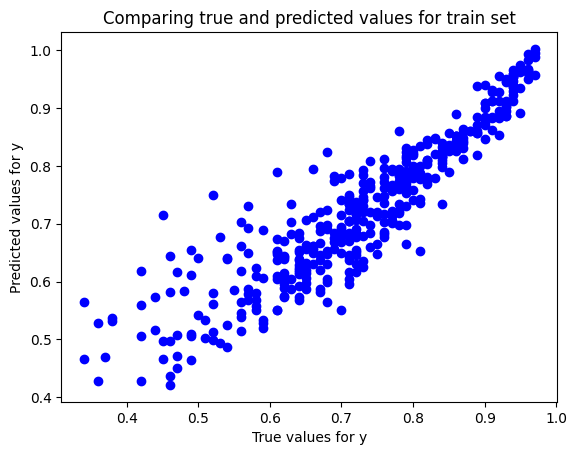

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_mlr, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

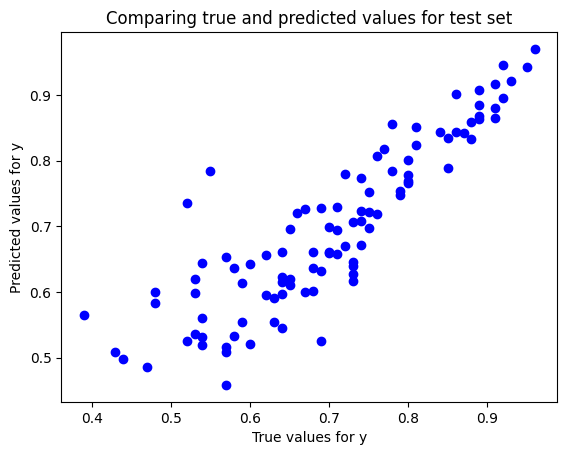

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_mlr, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

We find that Rsquared = 0.82, indicating that MLR has greater predictive power than SLR.

We will also be comparing model performance by using train and test error

In [ ]:
# From this data we can gather some metrics
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_test_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_test_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_mlr))
print("R squared: {:.2f}".format(mlr.score(x, y)))
print("Mean Absolute Error:", meanAbErr)
print("Mean Square Error:", meanSqErr)
print("Root Mean Square Error:", rootMeanSqErr)
# The preceding three values show the accuracy of the model's performance. The closer to 0, the better.
# All three values are close to zero, so these predicted values are close to accurate.

# Building a table for comparison
mlr_train_err = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_mlr))
mlr_test_err = rootMeanSqErr
mlr_abs_sum_vals = np.absolute(mlr.coef_).sum() + np.absolute(mlr.intercept_)
mlr_model = f"{mlr.intercept_:.5f} + {mlr.coef_[0]:.5f} X + {mlr.coef_[1]:.5f} X2 + {mlr.coef_[2]:.5f} X3 + {mlr.coef_[3]:.5f} X4 + {mlr.coef_[4]:.5f} X5 + {mlr.coef_[5]:.5f} X6 + {mlr.coef_[6]:.5f} X7"

mlr_vals = [mlr_model, mlr_train_err, mlr_test_err, mlr_abs_sum_vals]

mlr_results = pd.DataFrame(
    [mlr_vals], columns=["model", "train_err", "test_err", "abs sum"], index=["mlr"]
)
mlr_results

R squared: 0.82
Mean Absolute Error: 0.04825389374865468
Mean Square Error: 0.004079680034602102
Root Mean Square Error: 0.06387237301527243


,model,train_err,test_err,abs sum
mlr,-1.34417 + 0.00556 X + 0.00214 X2 + 0.00277 X3...,0.058481,0.063872,1.514739


### Ridge Regression

This is code for setting up ridge regression with an arbitrary alpha value

In [ ]:
# Ridge version

ridge = linear_model.Ridge(alpha=0.4)
ridge.fit(x_train, y_train)

y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

ridge_train_err = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_ridge))
ridge_test_err = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ridge))
ridge_abs_sum_vals = np.absolute(ridge.coef_).sum() + np.absolute(ridge.intercept_)
ridge_model = f"{ridge.intercept_:.5f} + {ridge.coef_[0]:.5f} X + {ridge.coef_[1]:.5f} X2 + {ridge.coef_[2]:.5f} X3 + {ridge.coef_[3]:.5f} X4 + {ridge.coef_[4]:.5f} X5 + {ridge.coef_[5]:.5f} X6 + {ridge.coef_[6]:.5f} X7"

ridge_vals = [ridge_model, ridge_train_err, ridge_test_err, ridge_abs_sum_vals]

ridge_results = pd.DataFrame(
    [ridge_vals], columns=["model", "train_err", "test_err", "abs sum"], index=["ridge"]
)
pd.concat([mlr_results, ridge_results])

,model,train_err,test_err,abs sum
mlr,-1.34417 + 0.00556 X + 0.00214 X2 + 0.00277 X3...,0.058481,0.063872,1.514739
ridge,-1.34764 + 0.00563 X + 0.00218 X2 + 0.00281 X3...,0.058483,0.063901,1.517037


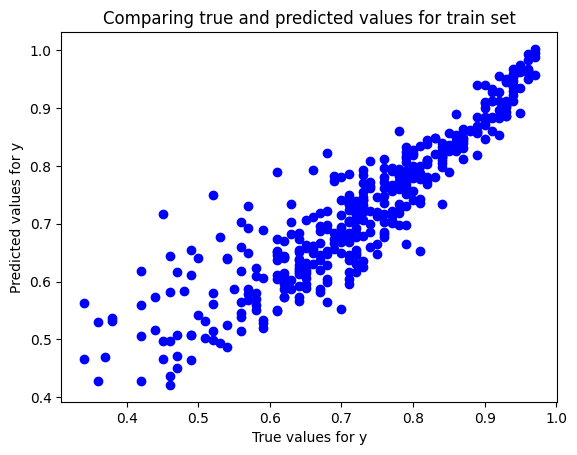

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_ridge, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

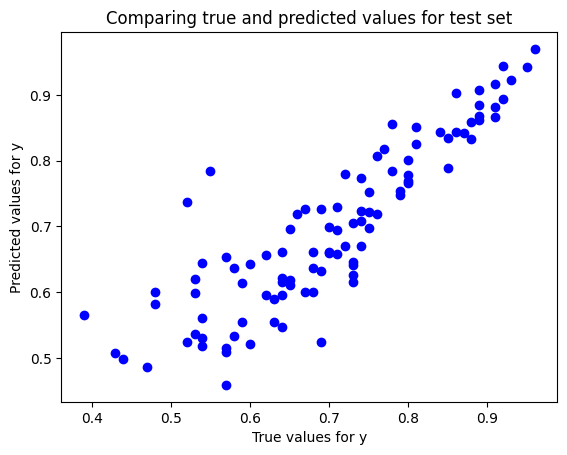

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_ridge, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

This is code for ridge regression with an optimized alpha value

In [ ]:
# Ridge w/ GridSearchCV
from sklearn.model_selection import GridSearchCV

ridge = linear_model.Ridge()
# param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
param_grid = {"alpha": np.logspace(-4, 1, 20)}
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error"
)
grid_search.fit(x_train, y_train)

best_ridge = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]

y_pred_train_best_ridge = best_ridge.predict(x_train)
y_pred_test_best_ridge = best_ridge.predict(x_test)

best_ridge_train_err = np.sqrt(
    metrics.mean_squared_error(y_train, y_pred_train_best_ridge)
)
best_ridge_test_err = np.sqrt(
    metrics.mean_squared_error(y_test, y_pred_test_best_ridge)
)
best_ridge_abs_sum_vals = np.absolute(best_ridge.coef_).sum() + np.absolute(
    best_ridge.intercept_
)
best_ridge_model = f"{best_ridge.intercept_:.5f} {best_ridge.coef_[0]:.5f} X + {best_ridge.coef_[1]:.5f} X2 + {best_ridge.coef_[2]:.5f} X3 + {best_ridge.coef_[3]:.5f} X4 + {best_ridge.coef_[4]:.5f} X5 + {best_ridge.coef_[5]:.5f} X6 + {best_ridge.coef_[6]:.5f} X7"

best_ridge_vals = [
    best_ridge_model,
    best_ridge_train_err,
    best_ridge_test_err,
    best_ridge_abs_sum_vals,
]

best_ridge_results = pd.DataFrame(
    [best_ridge_vals],
    columns=["model", "train_err", "test_err", "abs sum"],
    index=["best_ridge"],
)
print(f"alpha: {best_alpha}")
pd.concat([mlr_results, ridge_results, best_ridge_results])

alpha: 0.26366508987303583


,model,train_err,test_err,abs sum
mlr,-1.34417 + 0.00556 X + 0.00214 X2 + 0.00277 X3...,0.058481,0.063872,1.514739
ridge,-1.34764 + 0.00563 X + 0.00218 X2 + 0.00281 X3...,0.058483,0.063901,1.517037
best_ridge,-1.34647 0.00560 X + 0.00216 X2 + 0.00279 X3 +...,0.058482,0.063891,1.516259


Interestingly, ridge and best_ridge perform worse than regular MLR. Our group found this strange since we assumed that most of the variables would have a large amount of collinearity. For example, the GRE and TOEFL both test language. Our group believes this to be inherent to the academics dataset, since we got better performance in part a with out dataset, but we don't have a solid reason for why, however.

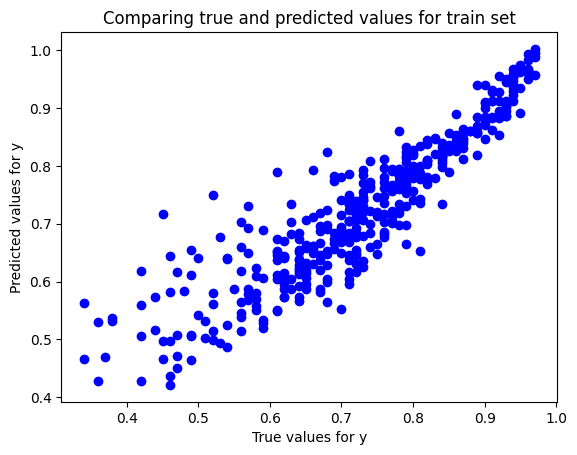

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_best_ridge, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

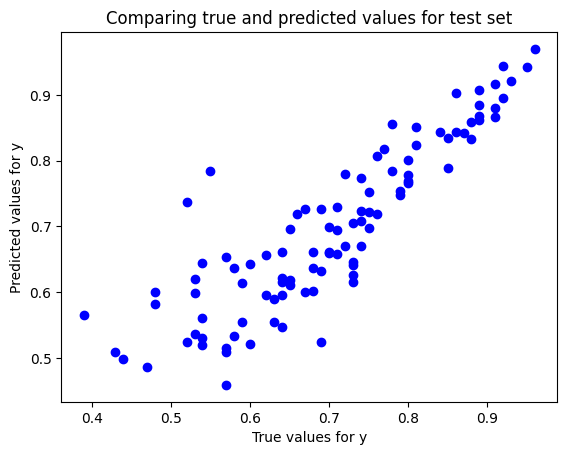

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_best_ridge, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

### Lasso Regression

This is code for lasso regression with an arbitrary alpha value

In [ ]:
# Lasso version

lasso = linear_model.Lasso(alpha=0.4)
lasso.fit(x_train, y_train)

y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

lasso_train_err = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lasso))
lasso_test_err = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lasso))
lasso_abs_sum_vals = np.absolute(lasso.coef_).sum() + np.absolute(lasso.intercept_)
lasso_model = f"{lasso.intercept_:.5f} + {lasso.coef_[0]:.5f} X + {lasso.coef_[1]:.5f} X2 + {lasso.coef_[2]:.5f} X3 + {lasso.coef_[3]:.5f} X4 + {lasso.coef_[4]:.5f} X5 + {lasso.coef_[5]:.5f} X6 + {lasso.coef_[6]:.5f} X7"

lasso_vals = [lasso_model, lasso_train_err, lasso_test_err, lasso_abs_sum_vals]

lasso_results = pd.DataFrame(
    [lasso_vals], columns=["model", "train_err", "test_err", "abs sum"], index=["lasso"]
)
pd.concat([mlr_results, ridge_results, lasso_results])

,model,train_err,test_err,abs sum
mlr,-1.34417 + 0.00556 X + 0.00214 X2 + 0.00277 X3...,0.058481,0.063872,1.514739
ridge,-1.34764 + 0.00563 X + 0.00218 X2 + 0.00281 X3...,0.058483,0.063901,1.517037
lasso,-1.55633 + 0.00000 X + 0.00720 X2 + 0.00000 X3...,0.089310,0.087617,1.563533


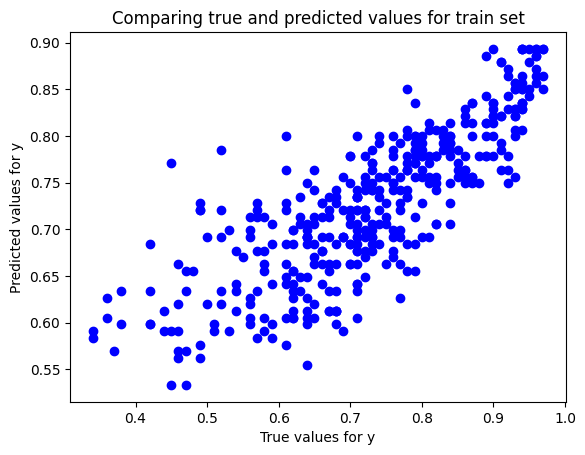

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_lasso, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

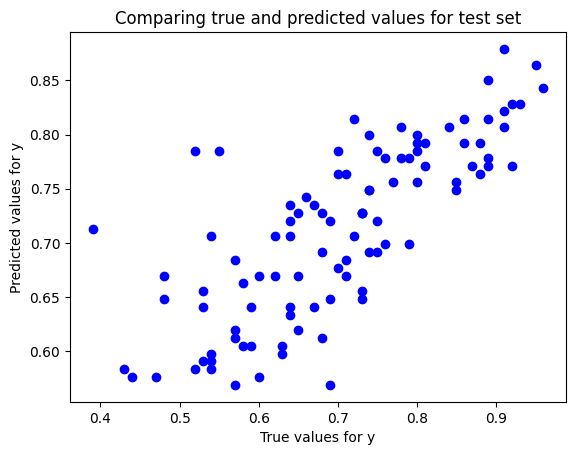

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_lasso, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

In [ ]:
# Lasso w/ GridSearchCV

from sklearn.model_selection import GridSearchCV

lasso = linear_model.Lasso()

# Setting up grid search
# param_grid = {'alpha': [0.000001, 0.00001, 0.0001, 0.1, 1]}
param_grid = {"alpha": np.logspace(-4, 1, 20)}
grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error"
)
grid_search.fit(x_train, y_train)

# Best model
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]

# Best model predictions
y_pred_train_best_lasso = best_lasso.predict(x_train)
y_pred_test_best_lasso = best_lasso.predict(x_test)

# Best model metrics
best_lasso_train_err = np.sqrt(
    metrics.mean_squared_error(y_train, y_pred_train_best_lasso)
)
best_lasso_test_err = np.sqrt(
    metrics.mean_squared_error(y_test, y_pred_test_best_lasso)
)
best_lasso_abs_sum_vals = np.absolute(best_lasso.coef_).sum() + np.absolute(
    best_lasso.intercept_
)
best_lasso_model = f"{best_lasso.intercept_:.5f} + {best_lasso.coef_[0]:.5f} X + {best_lasso.coef_[1]:.5f} X2 + {best_lasso.coef_[2]:.5f} X3 + {best_lasso.coef_[3]:.5f} X4 + {best_lasso.coef_[4]:.5f} X5 + {best_lasso.coef_[5]:.5f} X6 + {best_lasso.coef_[6]:.5f} X7"

best_lasso_vals = [
    best_lasso_model,
    best_lasso_train_err,
    best_lasso_test_err,
    best_lasso_abs_sum_vals,
]

best_lasso_results = pd.DataFrame(
    [best_lasso_vals],
    columns=["model", "train_err", "test_err", "abs sum"],
    index=["best_lasso"],
)
print(f"alpha: {best_alpha}")
pd.concat(
    [mlr_results, ridge_results, best_ridge_results, lasso_results, best_lasso_results]
)

alpha: 0.0006158482110660267


,model,train_err,test_err,abs sum
mlr,-1.34417 + 0.00556 X + 0.00214 X2 + 0.00277 X3...,0.058481,0.063872,1.514739
ridge,-1.34764 + 0.00563 X + 0.00218 X2 + 0.00281 X3...,0.058483,0.063901,1.517037
best_ridge,-1.34647 0.00560 X + 0.00216 X2 + 0.00279 X3 +...,0.058482,0.063891,1.516259
lasso,-1.55633 + 0.00000 X + 0.00720 X2 + 0.00000 X3...,0.089310,0.087617,1.563533
best_lasso,-1.39042 + 0.00556 X + 0.00239 X2 + 0.00296 X3...,0.058527,0.063983,1.552424


Similar to before, we were confused why lasso regression performs worse than regular MLR.

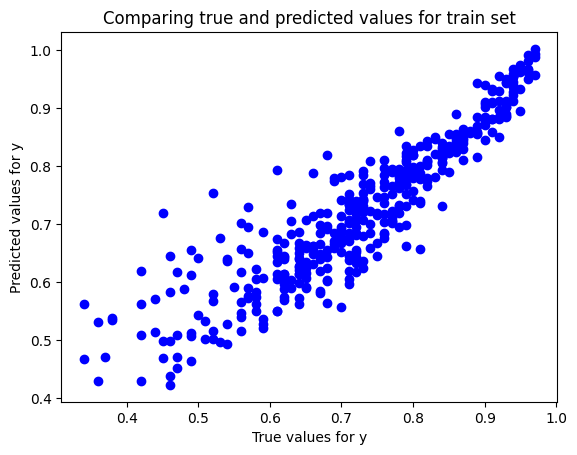

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_train, y_pred_train_best_lasso, color="blue")
plt.title("Comparing true and predicted values for train set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

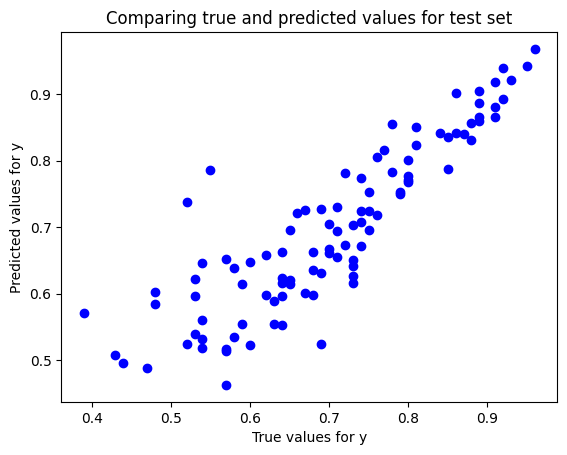

In [ ]:
# We can plot these actual vs predicted values
plt.scatter(y_test, y_pred_test_best_lasso, color="blue")
plt.title("Comparing true and predicted values for test set")
plt.xlabel("True values for y")
plt.ylabel("Predicted values for y")
plt.show()

## Classification Tree Work

Most of code from assignment [linked resource](https://www.datacamp.com/tutorial/decision-tree-classification-python)

In [ ]:
# Discretizing the Chance of Admit column into 3 classes
data3 = data2.copy()
data3['Admit_Class'] = pd.cut(data['Chance of Admit'], bins=[0, 0.6, 0.8, 1], labels=['Low', 'Medium', 'High'])
data3

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit_Class
0,337,118,4,4.5,4.5,9.65,1,0.92,High
1,324,107,4,4.0,4.5,8.87,1,0.76,Medium
2,316,104,3,3.0,3.5,8.00,1,0.72,Medium
3,322,110,3,3.5,2.5,8.67,1,0.80,Medium
4,314,103,2,2.0,3.0,8.21,0,0.65,Medium
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,High
496,337,117,5,5.0,5.0,9.87,1,0.96,High
497,330,120,5,4.5,5.0,9.56,1,0.93,High
498,312,103,4,4.0,5.0,8.43,0,0.73,Medium


Splitting dataset into test and train sets for decision tree.

In [ ]:
# Prepping data for decision tree
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
X = data3[feature_cols] # Features
y = data3['Admit_Class'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Decision trees aren't regression lines, so we have to use a different

1.   List item
2.   List item

metric for evaluating accuracy. In this case, we literally measure the tree's predicitive accuracy.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
predictions = pd.concat([y_test, pd.Series(y_pred, name='Predicted')], axis=1)
predictions = predictions.dropna()
predictions

Accuracy: 0.76


,Admit_Class,Predicted
47,High,Medium
67,Low,Medium
31,Medium,High
90,Medium,Low
66,Medium,Medium
65,Low,Low
34,High,Medium
4,Medium,High
5,High,Medium
62,Low,Medium


Visualizing the Decision Tree

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=["High", "Medium", "Low"],
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

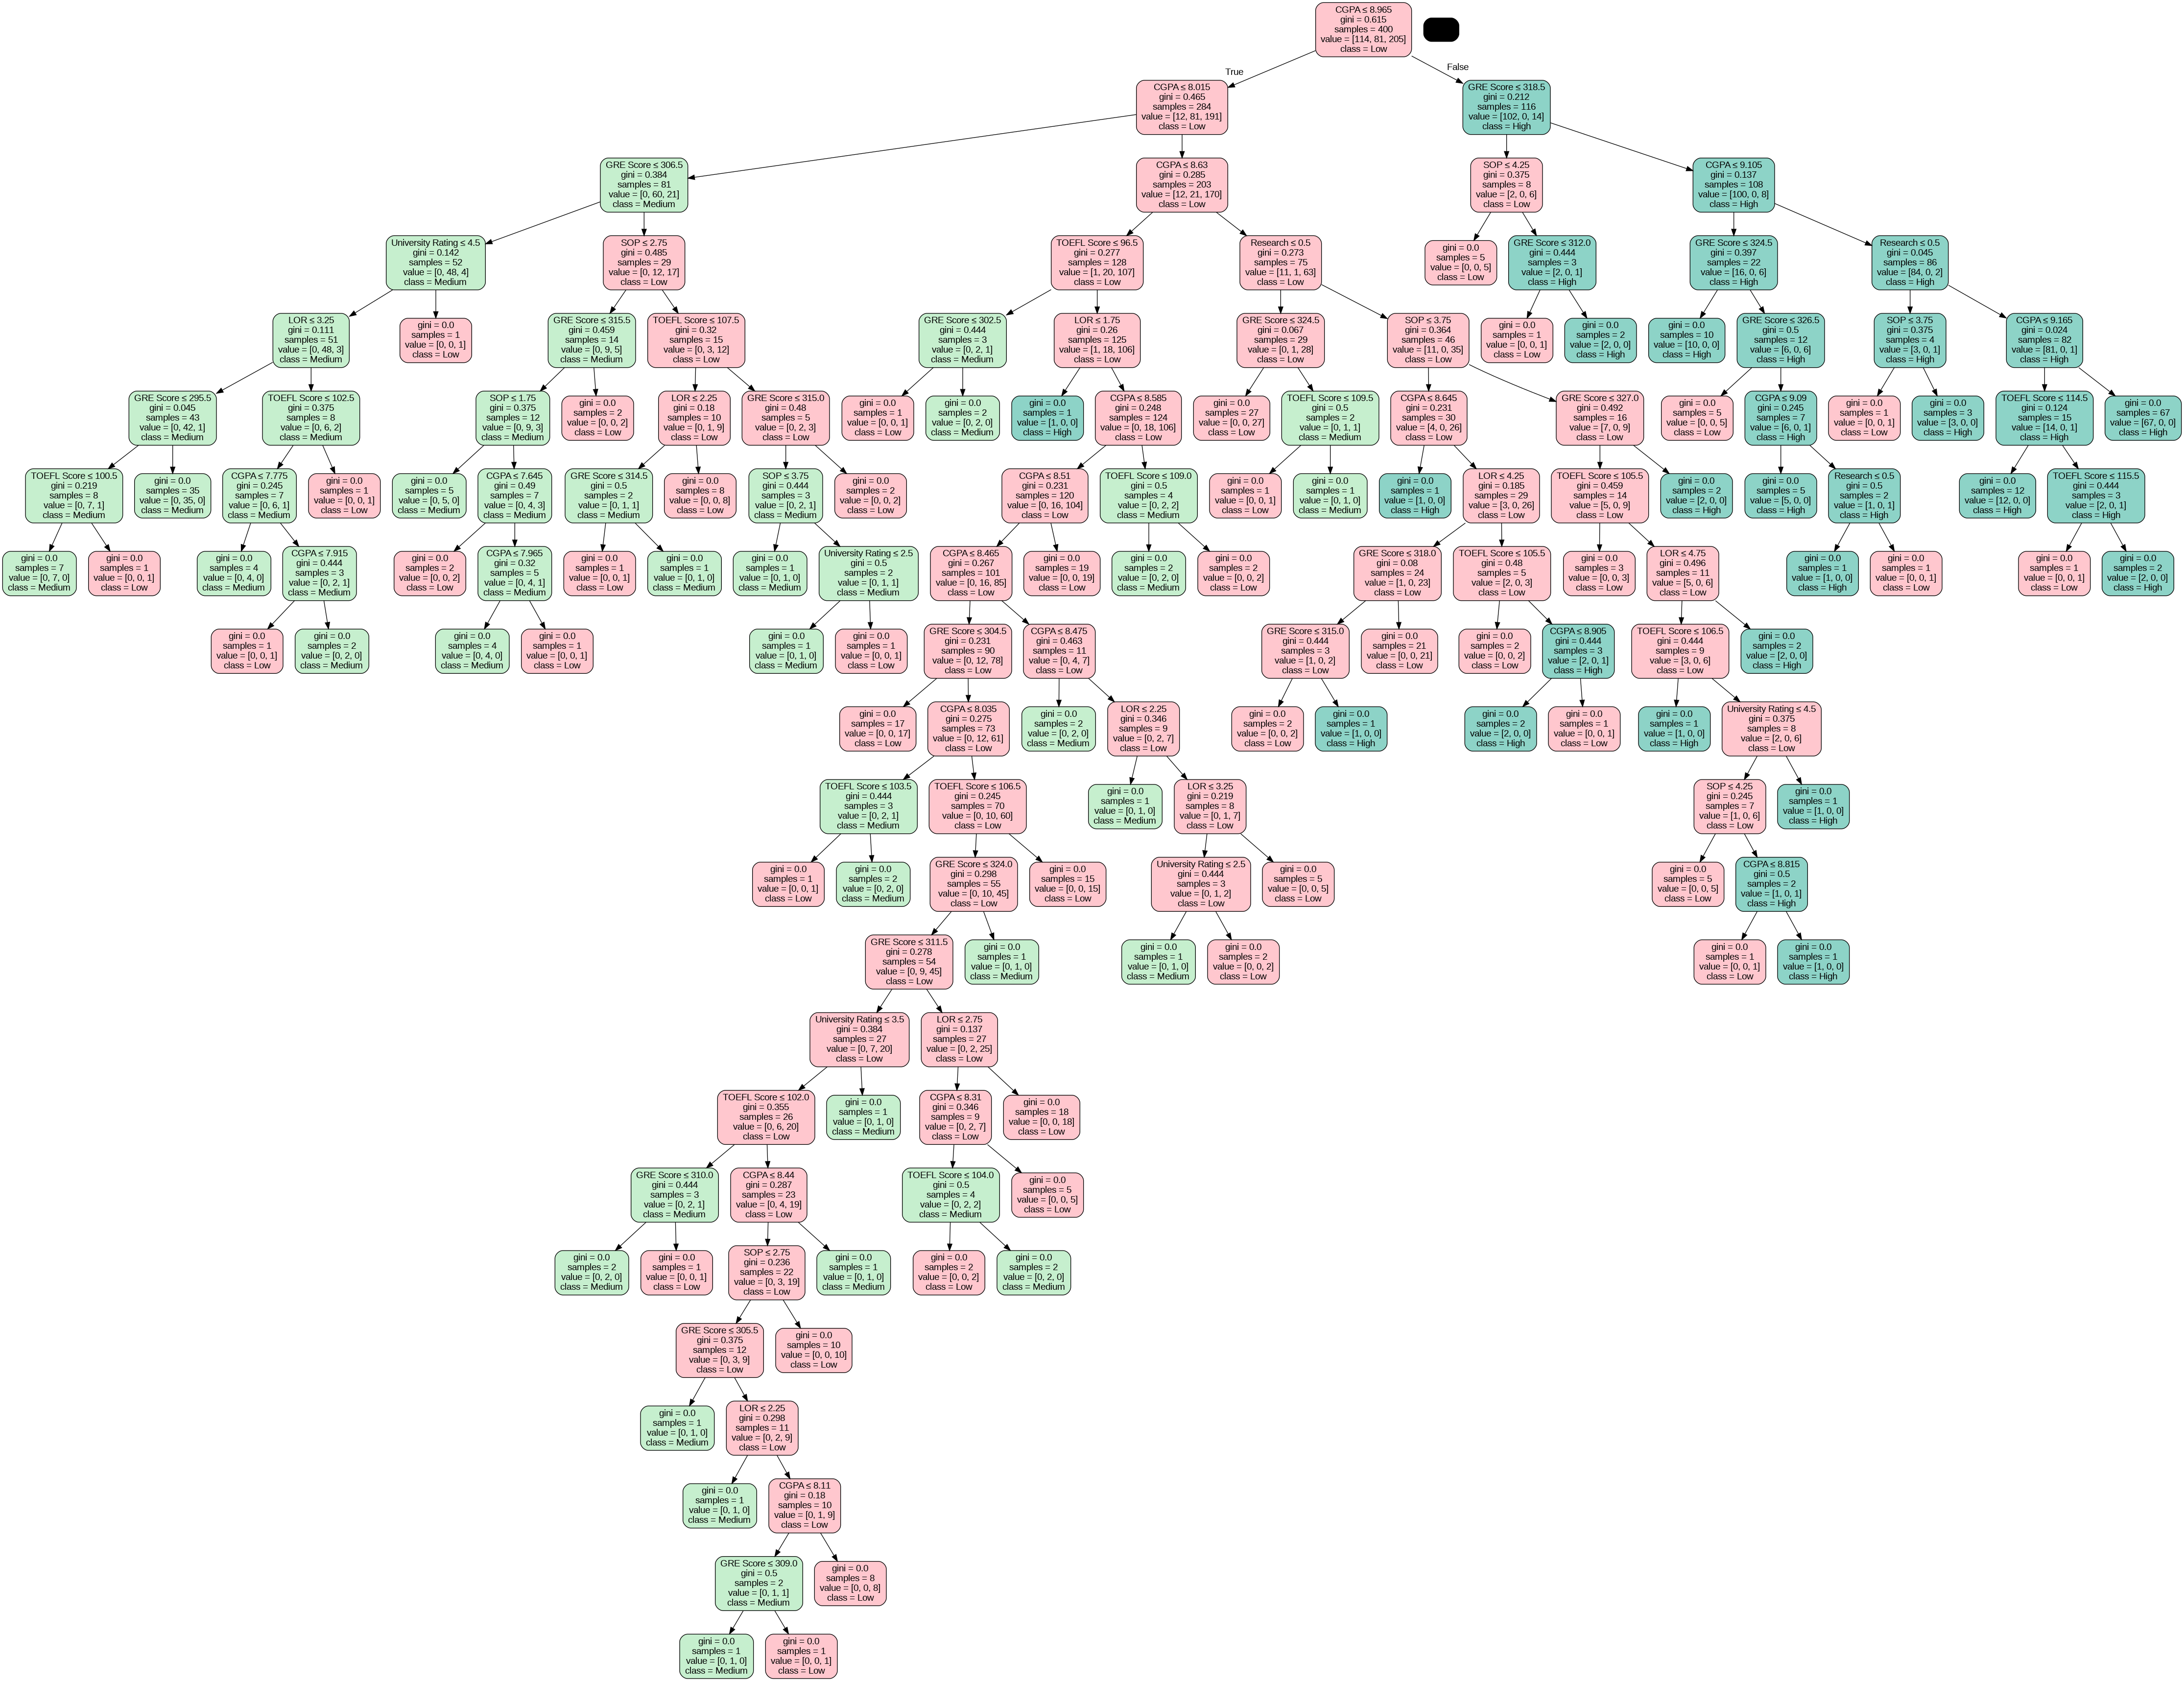

In [ ]:
# Image creation in separate block, because recreating graph takes a while
colors = ['#8DD3C7', '#C6EFCE', '#FFC7CE']  # Specify the colors for each class
for i, node in enumerate(graph.get_node_list()):
    if node.get_attributes().get('label') is None:
        continue
    if 'class = High' in node.get_attributes()['label']:
        node.set_fillcolor(colors[0])
    elif 'class = Medium' in node.get_attributes()['label']:
        node.set_fillcolor(colors[1])
    elif 'class = Low' in node.get_attributes()['label']:
        node.set_fillcolor(colors[2])
Image(graph.create_png())

It seems like the most impactful 'rules' of the decision tree are the ones that are closest to the top, since they create the largest separations in the dataset.

For example, the first decision divides CGPA <= 8.965, effectively splitting the dataset in two (284 + 116), where one of those parts contains most of the leaf nodes where a candidate has a `HIGH` admission chance. As the graph shows, a CGPA > 8.965 means that an applicant has a high chance of having a `HIGH` chance of admit from both number leaf nodes and sample size of each leaf node.

Likewise, there is a decision where the applicant's CGPA is below 8.015, also close to the root of the tree. This decision splits the remaining dataset in two (203 + 81), where one of those halves contains the vast majority of the scenarios that lead to a `MEDIUM` admission chance. Furthermore the applicant's admission chance is highly unlikely to be `HIGH`, meaning that the vast majority of applicants have a `MEDIUM` or `LOW` admission chance with a CGPA < 8.015.

For a final example, there is a decision centered around CGPA <= 9.165. While not as close to the root node as the other decision nodes covered, it is a leaf node that is fairly close to root (Node height of 5, tree height of 20). If this decision is not true, meaning that an applicants CGPA < 9.165, then the applicant is guaranteed to have a `HIGH` admission chance. This specific decision leads to the leaf node with the largest sample size (67).